## Zadanie 1

Porównać w języku Julia reprezentację bitową liczby 1/3 dla `Float16`, `Float32`, `Float64` oraz liczby, 
która jest inicjalizowana jako `Float16`, a potem rzutowana na `Float64`.

In [65]:
decode(x::Float16) = ((b=bitstring(x); (b[1], b[2:6], b[7:16])))
decode(x::Float32) = ((b=bitstring(x); (b[1], b[2:9], b[10:32])))
decode(x::Float64) = ((b=bitstring(x); (b[1], b[2:12], b[13:64])))

decode (generic function with 3 methods)

In [66]:
println(decode(Float16(1/3)))
println(decode(Float32(1/3)))
println(decode(Float64(1/3)))

('0', "01101", "0101010101")
('0', "01111101", "01010101010101010101011")
('0', "01111111101", "0101010101010101010101010101010101010101010101010101")


In [67]:
println(decode(Float64(Float16(1/3))))
println(decode(Float64(1/3)))

('0', "01111111101", "0101010101000000000000000000000000000000000000000000")
('0', "01111111101", "0101010101010101010101010101010101010101010101010101")


## Zadanie 2

Zbadać, jak zmienia się odległość między kolejnymi liczbami zminnoprzecinkowymi 
reprezentowanymi w komputerze za pomocą języka Julia. 
Narysować wykres używając Plots zależności odległości od wartości liczby dla zakresu  od 1.0 do 1000000.0.

In [68]:
test = []
for i=1.0:1000:1000000.0
    push!(test,eps(Float32(i)))
end

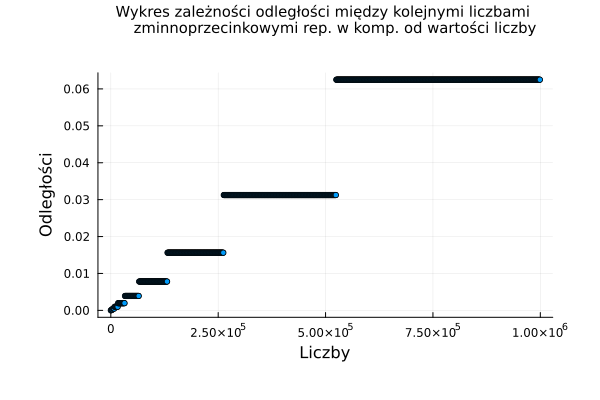

In [69]:
using Plots, Measures

scatter(1.0:1000:1000000.0, test,
    xlabel="Liczby",
    ylabel="Odległości",    
    title="Wykres zależności odległości między kolejnymi liczbami 
    zminnoprzecinkowymi rep. w komp. od wartości liczby",
    marker=:circle,
    markersize=3,
    titlefont=font(10),
    legend=false,
    margin=10mm
)

## Zadanie 3

Jedną z bibliotek numerycznych, jaką dodatkowo będziemy używać na zajęciach jest <a href="http://www.gnu.org/software/gsl/gsl.html">GSL</a> (język C). Opis <a href="https://www.gnu.org/software/gsl/doc/html/usage.html"> jak używać </a>. Korzystając ze <a href="https://www.gnu.org/software/gsl/doc/html/ieee754.html"> wsparcia dla wyświetlania reprezentacji liczb zmiennoprzecinkowych</a> zobaczyć jak zmienia się cecha i mantysa dla coraz mniejszych liczb. Zaobserwować, kiedy matysa przestaje być znormalizowana i dlaczego?

### main.c

```c 
#include <stdio.h>
#include <gsl/gsl_ieee_utils.h>

int main() {
    float f = 1e-33;
    int i = 1;
    while(f>0){
        printf("%i. ",i); gsl_ieee_printf_float(&f);
        printf("\n");
        f/=2.0;
        i++;
    }
    return 0;
}
```

### output

```c
maciejmakowski2003@ThinkPad-L14-Maciek:~/mownit$ ./computer_arithmetic

1.  1.01001100010011101001100*2^-110
2.  1.01001100010011101001100*2^-111
3.  1.01001100010011101001100*2^-112
4.  1.01001100010011101001100*2^-113
5.  1.01001100010011101001100*2^-114
6.  1.01001100010011101001100*2^-115
7.  1.01001100010011101001100*2^-116
8.  1.01001100010011101001100*2^-117
9.  1.01001100010011101001100*2^-118
10.  1.01001100010011101001100*2^-119
11.  1.01001100010011101001100*2^-120
12.  1.01001100010011101001100*2^-121
13.  1.01001100010011101001100*2^-122
14.  1.01001100010011101001100*2^-123
15.  1.01001100010011101001100*2^-124
16.  1.01001100010011101001100*2^-125
17.  1.01001100010011101001100*2^-126
18.  0.10100110001001110100110*2^-126
19.  0.01010011000100111010011*2^-126
20.  0.00101001100010011101010*2^-126
21.  0.00010100110001001110101*2^-126
22.  0.00001010011000100111010*2^-126
23.  0.00000101001100010011101*2^-126
24.  0.00000010100110001001110*2^-126
25.  0.00000001010011000100111*2^-126
26.  0.00000000101001100010100*2^-126
27.  0.00000000010100110001010*2^-126
28.  0.00000000001010011000101*2^-126
29.  0.00000000000101001100010*2^-126
30.  0.00000000000010100110001*2^-126
31.  0.00000000000001010011000*2^-126
32.  0.00000000000000101001100*2^-126
33.  0.00000000000000010100110*2^-126
34.  0.00000000000000001010011*2^-126
35.  0.00000000000000000101010*2^-126
36.  0.00000000000000000010101*2^-126
37.  0.00000000000000000001010*2^-126
38.  0.00000000000000000000101*2^-126
39.  0.00000000000000000000010*2^-126
40.  0.00000000000000000000001*2^-126
```

### Zadanie 4

Na przykładzie wybranego algorytmu niestabilnego numerycznie: 
1. Pokazać, że działa źle.
2. Pokazać które konkretnie działania powodują zwiększenie błędu (np. dzielenie przez małą liczbę, cancellation).
3. Zademonstować wersję stabilną.

### Wersja niestabilna

Jako algorytm niestabilny numerycznie możemy wybrać aproksymację funkcji $e^x$ szeregiem Maclaurina.

$e^x = \sum_{n=0}^{\infty} \frac{(x)^n}{n!}$

Spróbujmy policzyć jej wartość dla $x = -4.5$ z pomocą tej aproksymacji i porównajmy z faktyczną wartością. 

In [70]:
function approx_ex(x)
    result::Float16 = 0
    i = 0
    while(true)
        to_add = x^i / factorial(big(i))
        if (abs(to_add) < 2 ^ (-12))
                return result
        end        
        result +=  to_add
        i+=1
    end
    return result
end   

approx_ex (generic function with 2 methods)

In [71]:
x = -4.5
approx = approx_ex(x)
real_value = exp(x)
relative_error = abs(real_value - approx)/real_value 
println("approximation: ", approx);
println("real value: ", real_value);
println("difference: ", abs(approx - real_value));
println("relative error: ", relative_error*100,"%");

approximation: 0.00787
real value: 0.011108996538242306
difference: 0.003235461381992306
relative error: 29.124695204056923%


Jak łatwo zauważyć różnica jest znacząca, błąd względy wynosi około 29%. 

Przyczyną tak dużego błedu jest tzw. `Catastrophic cancellation`, czyli błąd spowodowany odejmowaniem od siebie bardzo bliskich siebie liczb. Wynikiem takiego odejmowania jest bardzo mała liczba. Gdy te liczby są normalizowane, mantysę przesuwamy w lewo, a pojawiające się miejsca po prawej są zastępywane przez zera lub losowe wartości, stąd tak duży błąd.

### Wersja stabilna

Aby uzyskać algorytm stabilny możemy skorzystać z prostej własności potęgowania: $e^x=\frac{1}{e^{-x}}$

Tym sposobem $e^{-4.5}=\frac{1}{e^{4.5}}$, a wiąc ten problem nie wystąpi licząc $e^{4.5}$, co spowoduje w miarę dokładny wynik $e^{-4.5}$.

In [72]:
x = -4.5
approx = 1/approx_ex(-x)
real_value = exp(x)
relative_error = abs(real_value - approx)/real_value 
println("approximation: ", approx);
println("real value: ", real_value);
println("difference: ", abs(approx - real_value));
println("relative error: ", relative_error*100,"%");

approximation: 0.01111
real value: 0.011108996538242306
difference: 5.981007423060819e-7
relative error: 0.005383931305110614%


Jak widać teraz błąd względny jest rzędu $10^{-3}$ %, a więc udało nam się względnie dokładnie wyliczyć szukaną wartośc funkcji $e^x$.